# Introduction

The practical exercises are in Python, a powerful interpreted language. Python is being commonly used in machine learning research, as it is fast, portable, has a clean syntax and sports a large collection of scientific software libraries including GPU-accelerated computing libraries which are often used for training deep neural networks. 

In order to deal with the more advanced mathematics that we deal with in this course, we make use of a few python libraries:

* numpy, which allows us to work with vectors and matrices
* scipy, which gives us access to scientific algorithms
* matplotlib, which allows us to plot our results

For this introduction, we will run our practical exercises within a "*notebook*": an interactive web page that integrates both code and text, allowing us to combine the code with documentation. In this case, you will edit this notebook to write your code and provide answers to the questions. Much of the documentation for python and its libraries can be found online. In particular, you should be able to do the exercises described in this document with the information available at https://docs.scipy.org/doc/scipy/. 

**The labs are not graded, but they are tied to the homeworks which are graded. Doing the labs first will make it easier to answer the questions in the homeworks**. One recurrent remark we got in previous years is that students regret not having put more effort in the labs, don't let that happen to you. The labs are there because they're useful, not to waste your time.

Now, before we start, let's load the libraries that we will need for this exercise. The notebook is organised into "cells", which can contain either code or formatted text. The current cell is a text cell: you can look at and modify the text by selecting the cell and pressing "enter", or by double-clicking on it. The text will be rendered when you then press control-enter or click run in the toolbar above.

To execute the code in a code cell, select the cell (using the mouse or arrow keys) and either click "run", press control-enter, or shift-enter (to run it and move on to the next cell).

In [1]:
# The following line makes sure that when we plot stuff it shows up in the notebook
%matplotlib inline 

import scipy.stats as stats     # Statistics module
import numpy as np              # Module for, among others, matrix operations
import matplotlib.pyplot as plt # Plotting

import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

# import os
# os.chdir("01") # On some servers, you need to manually indicate what directory to run the code from

print("That went fine")



That went fine


Running the above cell should only have created a new line stating ``That went fine``. If not, install any missing libraries as indicated by the error messages you may get.

# Basic stuff

Now let's play around a little with some data. Start by loading the variables saved in the file "*data.npz*". This can be done using the "**numpy.load**" command. This file contains multiple variables, which can be accessed as elements of a dictionary structure. In the following, we will refer to these variables by their key in the file, so for example, $v$ refers to the vector that you can access as *data['v']* if you called your dictionary "data".

Answer the following questions:

1. What is the dimensionality of $v$?
1. Compute the 2-norm, $|v|^2$, of $v$. Notice that v is relatively large, which can lead to out-of-memory errors if you're not careful. Check out the *numpy.inner* function.
1. use *%timeit* to check how long the computation takes, and report the results
1. How many elements of v are larger than 1? How many are larger than $2, 3,\dots,5$?

In [85]:
import timeit
#os.chdir("01")
d = np.load("data2.npz")

print("Elements in the file:")
for k in d.keys():
    print("  ",k,d[k].shape)

v = d['v']


# 2-norm of v

#timeit save time to a variable
# timeit -o norm_v = np.inner(v,v)

time = timeit.timeit(lambda: np.inner(v,v),number=1000)

norm_v = np.inner(v,v)
norm_v



count_more_1 = np.sum(v>1)
count_more_2 = np.sum(v>2)
count_more_3 = np.sum(v>3)

print("More than 1:",count_more_1)
print("More than 2:",count_more_2)
print("More than 3:",count_more_3)
norm_v

# print timeit results
print("Time taken",time)


Elements in the file:
   a (300,)
   b (300,)
   l (1000,)
   v (200000,)
   v2 (1000,)
More than 1: 31834
More than 2: 4472
More than 3: 262
Time taken 0.12414880000051198


## Plotting

Plot, in the range $[-5\dots 5]$, the Gaussiab PDFs with parameters $(\mu=0,\sigma=1), (\mu=0, \sigma=2), (\mu=0, \sigma=3)$. Use the functions *plt.plot*, *stats.norm.pdf* and *plt.legend*


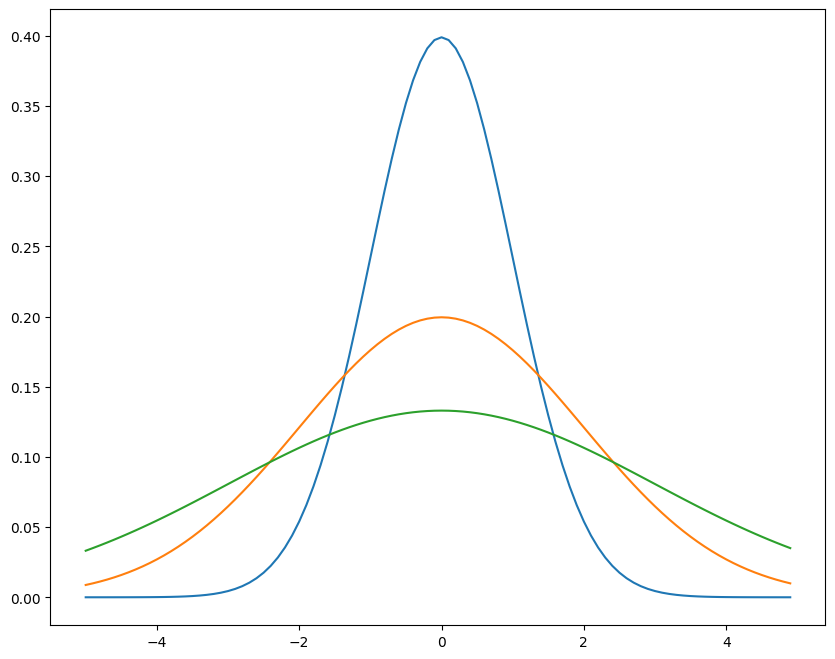

In [12]:

x = np.arange(-5,5,.1)

# plot in range [-5,5] the Gaussian PDFs with parameters (0,1), (0,2), (0,3)
plt.plot(x,stats.norm.pdf(x,0,1),label="N(0,1)")
plt.plot(x,stats.norm.pdf(x,0,2),label="N(0,2)")
plt.plot(x,stats.norm.pdf(x,0,3),label="N(0,3)")

## Playing with matrices and Python

Plot a normalised histogram of the elements in vector v2 using 20 bins, and superimpose a plot, in the range $[−5, \dots , 5]$ of the Gaussian distribution with the mean and variance of the data. Use the built-in functions to compute these. In particular, you can use **np.mean** and **np.var** to fit the parameters to the data.

(1000,)


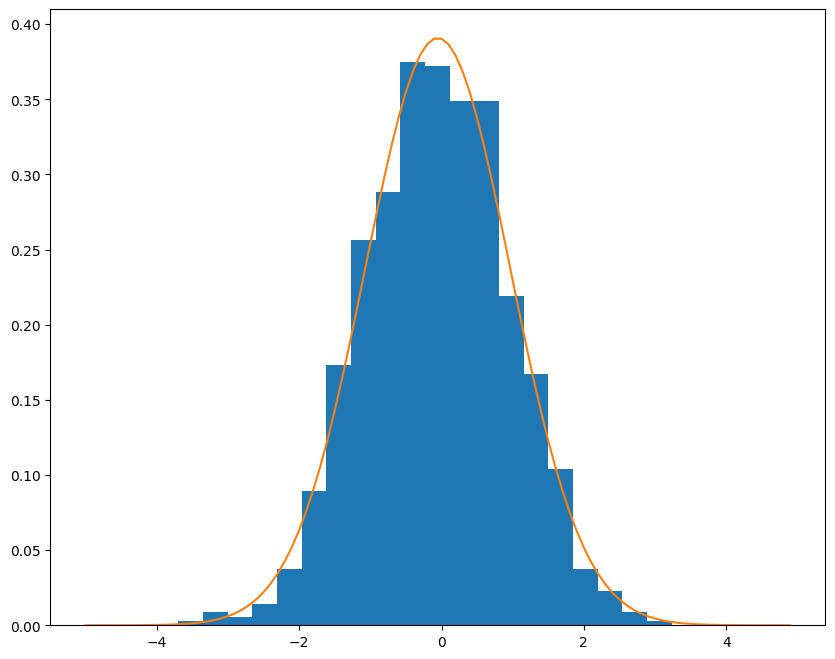

In [23]:
v2 = d["v2"]
print(v2.shape)


#normalized histogram
plt.hist(v2,bins=20,density=True)
plt.plot(x,stats.norm.pdf(x,np.mean(v2),np.var(v2)))
# help(np.var)

Get information on the *np.var* function using the **help** function. This function does not provide you with the maximum likelihood estimators (MLE) of the parameters. For the Gaussian function, the MLE are 

$$\boldsymbol{\mu} = \frac{\sum_{n=1}^N \mathbf{x}_n}{N}$$ 

and

$$\boldsymbol{\Sigma} = \frac{\sum_{n=1}^N (\mathbf{x}_n-\boldsymbol{\mu})^2}{N}$$

Compute these parameters by hand and compare the values you obtain to those returned by the built-in function. Depending on the version of the library you're using, you may have a different result due to the use of the unbiased estimator for the variance (which divides by $N-1$). How does your implementation compare in terms of execution speed?  
    

In [82]:
# help(np.var)

# MLE for Gaussian
mu = np.mean(v2)
sigma = np.sqrt(np.sum((v2-mu)**2)/v2.shape[0])



print("mu",mu,"sigma",sigma)


mu -0.05312146691764375 sigma 1.0103423336917583


# Visualising 2D data

Load the dataset in **data-2class.npz**. This file contains a set of 2-dimensional points $d$, and a corresponding set of labels $l$

1. Create a 2D scatterplot of $d$, using red for the elements with corresponding label 0, and blue for $l_i=1$

Optional:
1. Draw a straight line separating the two classes (it doesn't matter how you do it, the purpose is for you to think how this line would look, and how it could be used to classify the data. Next week, we'll see how to learn the functional representation of the line from data)
1. Fit two 2D Gaussian distributions, to the points with label $l_i=0$ and $l_i=1$. 
1. Create a heatmap plotting these two distributions and superimpose a scatterplot of the data. 



Elements in the file:
   d (1000, 2)
   l (1000, 1)


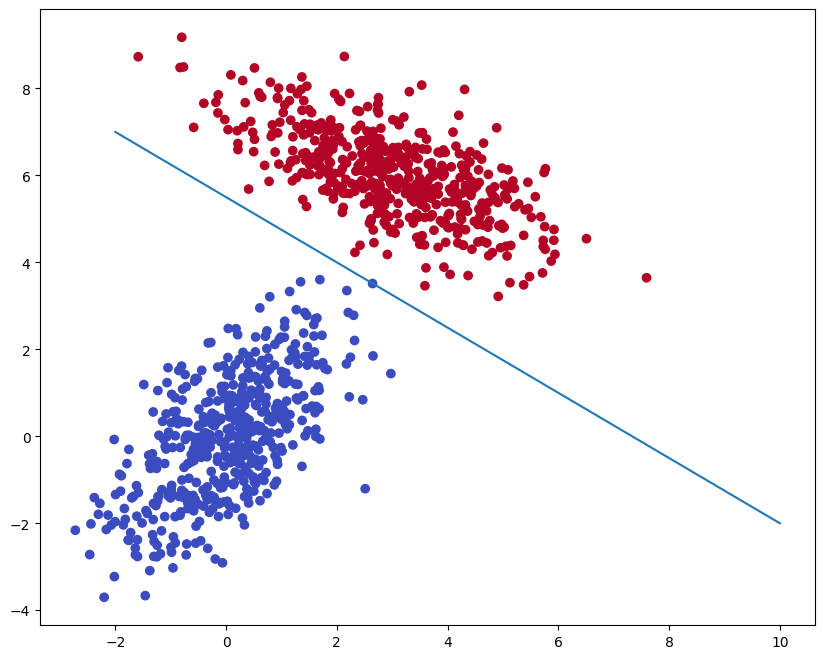

In [75]:
data1 = np.load("data-2class.npz")

print("Elements in the file:")
for k in data1.keys():
    print("  ",k,data1[k].shape)

# plot xx and yy 0 is blue 1 is red
# change colors

plt.set_cmap("coolwarm")
plt.scatter(data1["d"][:,0],data1["d"][:,1],c=data1["l"])

plt.plot([-2,10],[7,-2])




# Performance metrics

Consider a confusion matrix

$$
\mathbf C=\begin{bmatrix}
30 & 1 & 7 \\
3 & 4 & 0 \\
7 & 0 & 2
\end{bmatrix}
$$

Write functions the following functions:
- `accuracy(cm)` which returns the accuracy of the classifier based on the provided confusion matrix
- `precision(cm,c=0)` which returns the precision with respect to the indicated class $c$ (by default the first class, index 0)
- `recall(cm,c=0)` which returns the recall with respect to $c$

Use these functions to compute the macro-averaged precision and recall of the classifier.



In [81]:
confmat = np.array([[30,1,7],[3,4,0],[7,0,2]])

# Accuracy
def accuracy(cm):
    return np.sum(np.diag(cm))/np.sum(cm)

# precision
def precision(cm,c=0):
    return cm[c,c]/np.sum(cm[c,:])

# recall
def recall(cm,c=0):
    return cm[c,c]/np.sum(cm[:,c])

# check with built-in functions
print("Accuracy",accuracy(confmat))
print("Precision",precision(confmat))
print("Recall",recall(confmat))

# Macro-averaged precision and recall
precisions = [precision(confmat,c) for c in range(confmat.shape[0])]
recalls = [recall(confmat,c) for c in range(confmat.shape[0])]
macro_precision = np.mean(precisions)
macro_recall = np.mean(recalls)

macro_precision
macro_recall


Accuracy 0.6666666666666666
Precision 0.7894736842105263
Recall 0.75


np.float64(0.5907407407407407)